In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as lm
import sys
sys.path.append('C:\\Users\\Irisi\\spotify-song-popularity')
import exp


#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the given problem is a classificaton problem. Hence linear regression is used for ML algorithm
from sklearn.linear_model import LinearRegression

In [4]:
file = "features_15K.csv"
tds1 = pd.read_csv(file)
tds1 = tds1[['Artist', 'Track', 'followers','popularity','acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]
tds1.head()

,Artist,Track,followers,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Lionel Richie,Tonight Will Be Alright,1627956,38,0.05910,0.646,307413,0.840,0.014100,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,Course Of Nature,The Window,10469,11,0.00119,0.496,191160,0.928,0.000035,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,Mariah Carey,Inseparable,5505368,31,0.09090,0.586,213720,0.692,0.000000,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
3,Extra Virgin,One Night,880039,0,0.00361,0.643,210667,0.896,0.002050,0,0.9010,-6.662,1,0.0359,130.011,4,0.338
4,Joe and Will Ask?,Claymore,13,2,0.00328,0.699,119053,0.974,0.776000,9,0.2900,-5.576,0,0.1500,125.934,4,0.443


In [64]:
#tds1 = tds1.head(5000)
tds1.shape

(12064, 17)

# Linear Regression

## Define Datasets 

In [65]:
#Combined Dataset
dfcombine = tds1
#dfcombine = dfcombine.reset_index(inplace=True, drop=True)

#Target Dataset
dfy = pd.DataFrame(tds1["popularity"])

#all the independant variables/predictors are named as dfx
dfx = dfcombine.drop(columns=['Artist', 'Track','popularity'])
dfx.head()

,followers,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1627956,0.05910,0.646,307413,0.840,0.014100,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,10469,0.00119,0.496,191160,0.928,0.000035,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,5505368,0.09090,0.586,213720,0.692,0.000000,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
3,880039,0.00361,0.643,210667,0.896,0.002050,0,0.9010,-6.662,1,0.0359,130.011,4,0.338
4,13,0.00328,0.699,119053,0.974,0.776000,9,0.2900,-5.576,0,0.1500,125.934,4,0.443


In [66]:
dfy.head()

,popularity
0,38
1,11
2,31
3,0
4,2


In [67]:
#trying to get rid of >ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
np.where(dfx.values >= np.finfo(np.float64).max)
np.isnan(dfx.values.any())
dfx.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
#trying to get rid of >ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
np.where(dfy.values >= np.finfo(np.float64).max)
np.isnan(dfy.values.any())
dfy.replace([np.inf, -np.inf], np.nan, inplace=True)

## Train Set  - Linear Regression 

In [68]:
dfx.reset_index(inplace=True, drop=True)
dfy.reset_index(inplace=True, drop=True)
dfy.head()

,popularity
0,38
1,11
2,31
3,0
4,2


In [6]:
#Copy the code from Brooklyn 4.0 to set up the model as far as possible....

In [69]:
#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)

In [70]:
# linear regression 
from sklearn.linear_model import LinearRegression
linR = LinearRegression()
linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
#the target is predicted for the test dataset
predictions = linR.predict(X_test)
#the accuracy of the prediction is found to be.... 
linR.score(X_test,y_test)

0.2967684602526257

In [90]:
from sklearn.metrics import accuracy_score


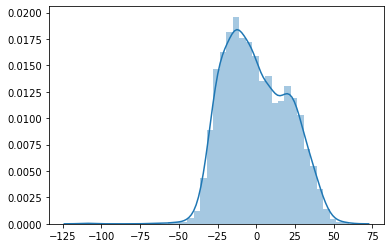

In [12]:
error = y_test - predictions
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error)

In [13]:
dfx.shape

(12064, 14)

In [21]:
oness = np.ones((12064,1),dtype = int)
dfone = pd.DataFrame(oness, columns = ['ones'])
dfxnew = dfone.join(dfx)
dfxnew.head()


,ones,followers,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,1627956,0.05910,0.646,307413,0.840,0.014100,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,1,10469,0.00119,0.496,191160,0.928,0.000035,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,1,5505368,0.09090,0.586,213720,0.692,0.000000,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
3,1,880039,0.00361,0.643,210667,0.896,0.002050,0,0.9010,-6.662,1,0.0359,130.011,4,0.338
4,1,13,0.00328,0.699,119053,0.974,0.776000,9,0.2900,-5.576,0,0.1500,125.934,4,0.443


In [22]:
dfxnew.reset_index(inplace=True, drop=True)
dfy.reset_index(inplace=True, drop=True)
print(dfy.shape)
print(dfxnew.shape)

(12064, 1)
(12064, 15)


In [15]:
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as lm

In [23]:
#OLS Regression - ,
lir_ols = lm.OLS(endog = dfy, exog = dfxnew).fit()
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     365.1
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:38:54   Log-Likelihood:                -53434.
No. Observations:               12064   AIC:                         1.069e+05
Df Residuals:                   12049   BIC:                         1.070e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ones                 6.5709      2.655      2.475      0.013       1.366      11.775
followers         2.176e-06   5.05e-08     43.060      0.000    2.08e-06    2.27e-06
acousticness        -1.6461      0.894     -1.841      0.066      -3.399       0.107
danceability        11.9009      1.356      8.775      0.000       9.243      14.559
duration_ms       6.164e-06   2.05e-06      3.007      0.003    2.15e-06    1.02e-05
energy              -2.3782      1.516     -1.569      0.117      -5.350       0.593
instrumentalness   -23.8400      0.673    -35.411      0.000     -25.160     -22.520
key                 -0.0353      0.052     -0.677      0.499      -0.138       0.067
liveness            -6.1980      1.139     -5.443      0.000      -8.430      -3.966
loudness            -0.5015      0.073     -6.841      0.000      -0.645      -0.358
mode                 1.8445      0.401      4.596      0.000       1.058       2.631
speechiness        -25.0214      2.163    -11.565      0.000     -29.262     -20.781
tempo               -0.0155      0.007     -2.266      0.023      -0.029      -0.002
time_signature       2.5198      0.501      5.028      0.000       1.538       3.502
valence             11.3908      0.919     12.401      0.000       9.590      13.191
==============================================================================
Omnibus:                      640.033   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.964
Skew:                           0.223   Prob(JB):                     4.49e-71
Kurtosis:                       2.333   Cond. No.                     6.00e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## RMSE Model with Plot

In [24]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 20.313038647604227
RMSE on Test set : 20.364728714471937


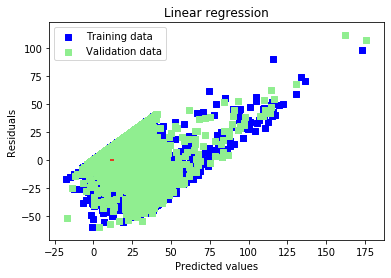

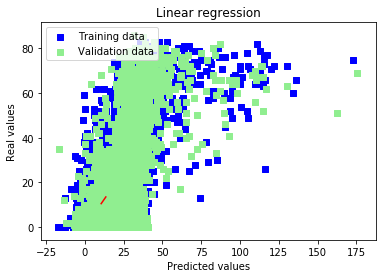

In [25]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## Once More Run - with fewer variables

In [28]:
dfx2 = dfxnew.drop(['time_signature','key','mode'], axis = 1)
dfx2.head()

,ones,followers,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,1,1627956,0.05910,0.646,307413,0.840,0.014100,0.0516,-8.213,0.0283,125.187,0.716
1,1,10469,0.00119,0.496,191160,0.928,0.000035,0.0988,-2.367,0.0469,144.932,0.561
2,1,5505368,0.09090,0.586,213720,0.692,0.000000,0.0567,-5.143,0.1770,158.041,0.457
3,1,880039,0.00361,0.643,210667,0.896,0.002050,0.9010,-6.662,0.0359,130.011,0.338
4,1,13,0.00328,0.699,119053,0.974,0.776000,0.2900,-5.576,0.1500,125.934,0.443


In [29]:
#OLS Regression
lir_ols = lm.OLS(endog = dfy, exog = dfx2).fit()
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     458.5
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:41:36   Log-Likelihood:                -53459.
No. Observations:               12064   AIC:                         1.069e+05
Df Residuals:                   12052   BIC:                         1.070e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ones                16.9643      1.920      8.838      0.000      13.202      20.727
followers         2.175e-06   5.06e-08     42.980      0.000    2.08e-06    2.27e-06
acousticness        -1.6508      0.895     -1.844      0.065      -3.406       0.104
danceability        12.3820      1.344      9.211      0.000       9.747      15.017
duration_ms       6.086e-06   2.05e-06      2.969      0.003    2.07e-06    1.01e-05
energy              -2.0857      1.516     -1.376      0.169      -5.058       0.886
instrumentalness   -24.1271      0.673    -35.849      0.000     -25.446     -22.808
liveness            -6.1647      1.141     -5.404      0.000      -8.401      -3.929
loudness            -0.5006      0.073     -6.817      0.000      -0.645      -0.357
speechiness        -25.9203      2.164    -11.979      0.000     -30.162     -21.679
tempo               -0.0141      0.007     -2.067      0.039      -0.027      -0.001
valence             11.4565      0.920     12.451      0.000       9.653      13.260
==============================================================================
Omnibus:                      643.964   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.810
Skew:                           0.228   Prob(JB):                     6.56e-72
Kurtosis:                       2.333   Cond. No.                     5.21e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfx2, dfy, test_size=0.3, random_state=42)
linR2 = LinearRegression()
linR2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#the target is predicted for the test dataset
predictions = linR2.predict(X_test2)
#the accuracy of the prediction is found to be.... 
linR2.score(X_test2,y_test2)

0.29593585633171704

## Next Steps - Normalisation

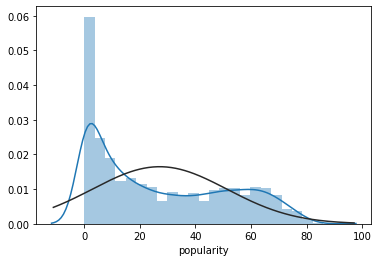

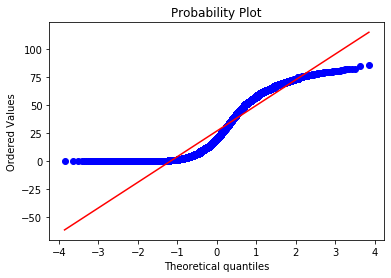

In [32]:
#histogram and normal probability plot
sns.distplot(tds1['popularity'], fit=norm);
fig = plt.figure()
res = stats.probplot(tds1['popularity'], plot=plt)

C:\Users\Irisi\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


OverflowError: cannot convert float infinity to integer

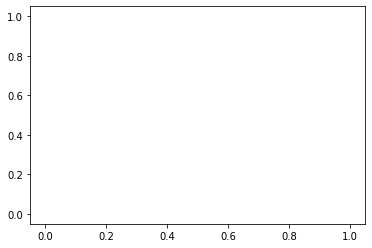

In [5]:
#applying log transformation
y_lg = np.log(tds1['popularity'])

#transformed histogram and normal probability plot
sns.distplot(y_lg, fit=norm);
fig = plt.figure()
res = stats.probplot(y_lg, plot=plt)
fig

# Classification Models 

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

##  Dataframe & Feature Set-up 

In [74]:
dataframe = tds1
dataframe.shape


(12064, 17)

Text(0.5, 1.0, 'Popularity Distribution')

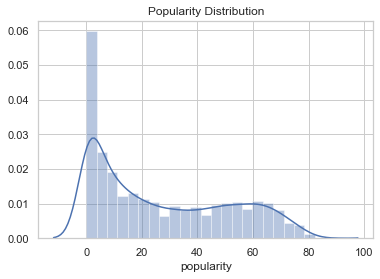

In [75]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [76]:
dataframe.loc[dataframe['popularity'] == 0]
dataframe.shape

(12064, 17)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


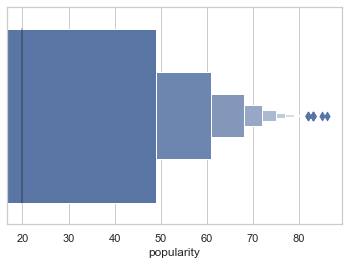

In [77]:
import seaborn as sns

sns.set(style="whitegrid")

tips = sns.load_dataset("tips")

ax = sns.boxenplot(x=dataframe['popularity'])

In [78]:
#Convert popularity to binary varible. 
#we will define above 20 as "popular" since that's the border of the top 25% of songs and encode that as 1,
#and below 75 as "not popular" and encode that as 0.

dataframe.loc[dataframe['popularity'] < 35, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 35, 'popularity'] = 1
#dataframe.loc[dataframe['popularity'] == 0]


In [79]:
dataframe['popularity'].value_counts()

0    7596
1    4468
Name: popularity, dtype: int64

In [80]:
features = ["danceability", "energy", "followers", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [81]:
#Next we define 80% of the dataframe for training and 20% of the dataframe for testing.
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

In [82]:
#We add a validation dataset using train_test_split.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

## Logistic Regresssion 

In [83]:
#Logistic Regression
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.7540134645261523
AUC: 0.6931263757460231


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## RandomForestClassifier

In [84]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.8187467633350596
AUC: 0.798310527151837


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## K-Nearest Neighbors Classifier

In [86]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.815639564992232
AUC: 0.7988619601969728


## Decision Tree Classifier

In [87]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.7679958570688762
AUC: 0.7581920711643634


## Model Performance Summary

In [88]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      ],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC]})

In [89]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)


,Model,Accuracy
1,RandomForestClassifier,0.818747
2,KNeighborsClassifier,0.815640
3,DecisionTreeClassifier,0.767996
0,LogisticRegression,0.754013


In [90]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

,Model,AUC
2,KNeighborsClassifier,0.798862
1,RandomForestClassifier,0.798311
3,DecisionTreeClassifier,0.758192
0,LogisticRegression,0.693126
